# **Object Oriented Programming (OOP) with Python**

**Instructor:** [Freddy Carrión Maldonado.](https://www.linkedin.com/in/freddy-carri%C3%B3n-maldonado-b3579b125/)

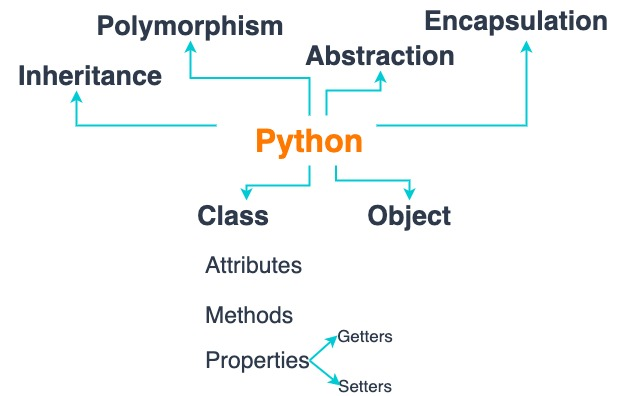\
*Figure 1. Main features of OOP in Python*

## **Content**

- 1. Classes and Objects.
- 2. Inheritance.
- 3. OOP in a Dynamic Language.
- 4. Polimorphism
- 5. Encapsulation.
- 6. Classes in Python

*This Lecture has an estimated duration of **4 hours**.*

## **1. Classes and Objects**

A class is an object and can be used to create class methods and static methods.\
**“In Python, everything is an object”**

In [58]:
class Employee:
    def __init__(self, name, last_name, salary):
        self.name = name
        self.last_name = last_name
        self.salary = salary
        
    def get_full_name(self):
        return f"{self.name} {self.last_name}"
    
    def raise_salary(self, percentage):
        self.salary = self.salary * (100 + percentage) / 100
        
    def add_bonus(self, amount):
        self.salary = self.salary + amount
        
e1 = Employee("Freddy", "Carrion", 1900)
e1

In [59]:
print(e1.get_full_name())

Freddy Carrion


In [60]:
e1.raise_salary(12)

e1.add_bonus(100)
print(f" USD {e1.salary}")

 USD 2228.0


In [62]:
class Product:
    def __init__(self, product_id, name, price):
        self.product_id = product_id
        self.name = name
        self.price = price
        
    def __str__(self):
        return f"{self.name}, ${self.price}"

    def __repr__(self):
        return f"{self.name} ({self.product_id})"

products = [
    Product(1, "Headphones", 49.99),
    Product(2, "Monitor speaker", 150.0),
    Product(3, "Soundcard", 78.5),
]

for p in products:
    print(p)

Headphones, $49.99
Monitor speaker, $150.0
Soundcard, $78.5


## **2. Inheritance**

In this example, there are two inheritaded classes.

- Abstract class.

In [71]:
from abc import ABC

class Employee(ABC):
    def __init__(self, name, salary):
        self.name =  name
        self.salary = salary
        
    def get_info(self):
        return f"Employee {self.name}, salary ${self.salary}"
    
class Manager(Employee):
    def get_info(self):
        return f"Manager {self.name}, salary ${self.salary}"
    
class Programmer(Employee):
    def get_info(self):
        return f"Programmer {self.name}, salary ${self.salary}"

employess = [Manager("Nia", 2100), Employee("Freddy", 1900),
            Programmer("Luis", 1000)]

for e in employess:
    print(e.get_info())

Manager Nia, salary $2100
Employee Freddy, salary $1900
Programmer Luis, salary $1000


## **3. Extending Methods**

In [87]:
class Shape:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Circle(Shape):
    def __init__(self, x, y, radius):
        super().__init__(x, y)
        self.radius = radius

    def render(self):
        return f"Rendering circle at x:{self.x}, y:{self.y}."

class Rectangle(Shape):
    def __init__(self, x, y, width, height):
        super().__init__(x, y)
        self.width = width
        self.height = height

    def render(self):
        return f"Rendering rectangle at x:{self.x}, y:{self.y}."

    
shapes = [Circle(30, 40, 15), Rectangle(100, 20, 40, 20)]

for s in shapes:
    print(s.render())

Rendering circle at x:30, y:40.
Rendering rectangle at x:100, y:20.


## **4. Polimorphism**

In [89]:
class Circle:
    def render(self):
        return "Circle geometry"

class Rectangle:
    def render(self):
        return "Rectangel geometry"

shapes = [Circle(), Rectangle()]

for s in shapes:
    print(s.render())

Circle geometry
Rectangel geometry


In [95]:
class Text:
    def __init__(self, text):
        self.text = text
        
class Header(Text):
    def format(self):
        return f"{self.text}\n{'=' * len(self.text)}"
    
class Paragraph(Text):
    def format(self):
        return f"\n{self.text}"
    
class UpercaseParagraph(Text):
    def format(self):
        return f"\n{self.text.upper()}"
    
document = [Header("CFD"),
            Paragraph("This is the best way of doing simulation of fluids flow by using NS Equations."),
           UpercaseParagraph("Furthermore, CFD could be work with DL.")]

for d in document:
    print(d.format())

CFD
===

This is the best way of doing simulation of fluids flow by using NS Equations.

FURTHERMORE, CFD COULD BE WORK WITH DL.


## **5. Encapsulation**

Here is everything related to private and public class's members.

In [113]:
class Employee:
    def __init__(self, name, salary):
        self.__name = name
        self.__salary = salary

    def get_info(self):
        return f"{self._name}, ${self._salary}"

e = Employee("Tapia", 1800)
e.__salary += 1000
print(e.get_info())

AttributeError: 'Employee' object has no attribute '__salary'

In [116]:
class Employee:
    def __init__(self, first_name, last_name, salary):
        self._first_name = first_name
        self._last_name = last_name
        self._salary = salary

    def get_full_name(self):
        return f"{self._first_name} {self._last_name}"
    
    def raise_salary(self, percentage):
        self._salary = self._salary * (100 + percentage) / 100
        
    def get_year_salary(self):
        return self._salary * 12
    
e = Employee("Freddy", "Carrion", 1900)

e.raise_salary(10)
print(e.get_full_name())
print(e.get_year_salary())

Freddy Carrion
25080.0


## **5.1 Properties**

In [117]:
class Employee:
    def __init__(self, name):
        self._name = name
        self._salary = None

    def get_salary(self): # getter
        return self._salary

    def set_salary(self, value): # setter
        self._salary = value

e = Employee("Vera")
e.set_salary(2000)
print(e.get_salary())

2000


In [263]:
class Employee:
    def __init__(self, name: str):
        self._name = name
        self._salary = None

    @property    
    def salary(self) -> float: # getter
        return f"Salary: USD {self._salary}"

    @salary.setter
    def salary(self, value: float) -> None: # setter
        if value > 5000:
            raise ValueError("Maximum salary is 5000")
        self._salary = value

e = Employee("Vera")
e.salary = 3000
print(e.salary)

Salary: USD 3000


In [190]:
class Well:
    def __init__(self, well_name: str, oil_rate: float):
        self.well_name = well_name
        self.oil_rate = oil_rate
        self._fluid_rate = None
        
    @property
    def fluid_rate(self) -> str:
        return f"{self._fluid_rate} BFPD"
    
    @fluid_rate.setter
    def fluid_rate(self, water_cut: float) -> None:
        self._fluid_rate = self.oil_rate + (self.oil_rate * water_cut) / 100
        
    def get_well_info(self) -> str:
        return f"Well:{self.well_name}\nOil Rate:{self.oil_rate} BPD"
        
well = Well("Auc1", 1000)
well.fluid_rate = 60
print(well.fluid_rate)
print()
print(well.get_well_info())

1600.0 BFPD

Well:Auc1
Oil Rate:1000 BPD


In [148]:
wells = [Well("Auc2", 2000), Well("Tor3", 250)]

for w in wells:
    print(w.get_well_info())
    
print(type(wells))
print(type(well))

Well:Auc2
Oil Rate:2000 BPD
Well:Tor3
Oil Rate:250 BPD
<class 'list'>
<class '__main__.Well'>


In [275]:
class Reservoir:
    def __init__(self, name: str, well: str, oiip: float):
        self.name = name
        self.well = well
        self.oiip = oiip
        self._fluid_prod = None
        
    def info_res(self) -> str:
        return f"Oil Reservoir:{self.name}\nOiip: {self.oiip} Bbls"
    
    @property
    def fluid_prod(self) -> str: # getter
        return f"Fluid production is: {self._fluid_prod} BFPD"
    
    @fluid_prod.setter
    def fluid_prod(self, prod: float) -> None:  # setter
        if prod > 10000:
            raise ValueError("Maximum fluid production is 10000 BFPD") 
            
        self._fluid_prod = prod
        
res = Reservoir("Tena", "IS-3", 200000)

res.fluid_prod = 5235
print(res.fluid_prod)
print()
print(res.info_res())

print(type(res))

Fluid production is: 5235 BFPD

Oil Reservoir:Tena
Oiip: 200000 Bbls
<class '__main__.Reservoir'>


In [237]:
class Thermostat:
    """_temperature stores temperature in degrees celsius """
    
    def __init__(self):
        self._temperature = None
    class Reservoir:
    def __init__(self, name: str, well: str, oiip: float):
        self.name = name
        self.well = well
        self.oiip = oiip
        self._fluid_prod = None
        
    def info_res(self) -> str:
        return f"Oil Reservoir: {self.name}\nOiip: {self.oiip} Bbls"
    
    @property
    def fluid_prop(self) -> str:  # getter
        return f"Fluid production is: {self._fluid_prod} BFPD"
    
    @fluid_prop.setter
    def fluid_prop(self, prod: float) -> None:  # setter
        if prod > 10000:
            raise ValueError("Maximum fluid production is 10000 BFPD") 
            
        self._fluid_prod = prod

res = Reservoir("Tena", "IS-3", 200000)

res.fluid_prop = 5235  # Use fluid_prop instead of fluid_prod
print(res.fluid_prop)
print()
print(res.info_res())
print(type(res))

    @property
    def temperature_celcius(self) -> str:
        return f"Temperature: {self._temperature}oC"
        
    @temperature_celcius.setter
    def temperature_celcius(self, value: float) -> None:
        self._temperature = value
        
    @property
    def temperature_farenheit(self) -> str:
        return f"Temperature: {self._temperature * 9 / 5 + 32}oF"
        
    @temperature_farenheit.setter
    def temperature_farenheit(self, value: float) -> None:
        self._temperature = (value - 32) * 5 / 9
        
thermostat = Thermostat()

thermostat.temperature_celcius = 20
print(thermostat.temperature_celcius)
print(thermostat.temperature_farenheit)

print()

thermostat.temperature_farenheit = 95
print(thermostat.temperature_celcius)
print(thermostat.temperature_farenheit)
print(type(thermostat))

Temperature: 20oC
Temperature: 68.0oF

Temperature: 35.0oC
Temperature: 95.0oF
<class '__main__.Thermostat'>


In [260]:
class ConversionUnits:
    def __init__(self):
        self._pressure = None
        self._length = None
        
    @property
    def pressure_pa(self) -> str:
        return f"Pressure: {self._pressure} Pa"
    
    @pressure_pa.setter
    def pressure_pa(self, value: float) -> None:
        self._pressure = value
        
    @property
    def pressure_psi(self) -> str:
        return f"Pressure: {self._pressure / 6894.76:.3f} Psi"
    
    @pressure_psi.setter
    def pressure_psi(self, value: float) -> None:
        self._pressure = value * 6894.76
        
    @property
    def length_m(self) -> str:
        return f"Length: {self._length:.2f} m"
    
    @length_m.setter
    def length_m(self, value: float) -> None:
        self._length = value
        
    @property
    def length_ft(self):
        return f"Length: {self._length / 0.3048:.3f} ft"
    
    @length_ft.setter
    def length_ft(self, value: float) -> None:
        self._length = value * 0.3048
        
        
pressure = ConversionUnits()

pressure.pressure_pa = 100
print(pressure.pressure_pa)
print(pressure.pressure_psi)

print()

pressure.pressure_psi = 100
print(pressure.pressure_pa)
print(pressure.pressure_psi)

print()
print("Length Units")
print() 

length = ConversionUnits()

length.length_m = 10
print(length.length_m)
print(length.length_ft)

print()

length.length_ft = 30
print(length.length_m)
print(length.length_ft)
print(type(thermostat))

Pressure: 100 Pa
Pressure: 0.015 Psi

Pressure: 689476.0 Pa
Pressure: 100.000 Psi

Length Units

Length: 10.00 m
Length: 32.808 ft

Length: 9.14 m
Length: 30.000 ft
<class '__main__.Thermostat'>


In [277]:
class Employee:
    def __init__(self, name):
        self._name = name
        self._salary = 2000
    
    @property
    def salary(self): # getter
        return self._salary

e = Employee("Vera")
print(e.salary)

2000


In [278]:
class Employee:
    def __init__(self, name):
        self._name = name
        self._salary = 2000
    
    @property
    def salary(self): # getter
        return self._salary

e = Employee("Vera")
e.salary = 3000

AttributeError: can't set attribute 'salary'

## **6. Classes in Python**

There are 3 types of class methods:
- Instance methods: Those that use **self** as the first parameter. They need a class instance (an object).
- Class methods: they have access to the class. Do not need a class instance.
- Static methods: They do not have access to the class. Do not need a class instance.

In [280]:
class Attendant:
    def __init__(self, name, job_title):
        self.name = name
        self.job_title = job_title

    def __str__(self):
        return f"{self.name}, {self.job_title}"

vera = Attendant("Vera", "Station Attendant")
dave = Attendant("Dave", "Station Attendant")
print(vera)
print(dave)

Vera, Station Attendant
Dave, Station Attendant


In [283]:
class Attendant:
    job_title = "Station Attendant" # Class variable
    
    def __init__(self, name, job_title):
        self.name = name

    def __str__(self):
        return f"{self.name}, {self.job_title}"

vera = Attendant("Vera", "Station Attendant")
dave = Attendant("Dave", "Station Attendant")
print(vera)
print(dave)

Vera, Station Attendant
Dave, Station Attendant


In [284]:
class Address:
    def __init__(self, ip, port):
        self.ip = ip
        self.port = port

    @classmethod
    def from_url(cls, url):
        ip, port = url.split(":")
        return cls(ip, port)

a1 = Address("127.0.0.1", 8000)
print(a1.ip, a1.port)

a2 = Address.from_url("128.0.0.1:8000")
print(a2.ip, a2.port)

127.0.0.1 8000
128.0.0.1 8000
